Install environment using toutorial: https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/index.html

In [1]:
print("Hello World")

Hello World


THIS cell run only ones in a project

In [1]:
!mkdir TensorFlow

Cloning Model Garden for TensorFlow

In [3]:
!git clone https://github.com/tensorflow/models.git ./TensorFlow/models

Cloning into './TensorFlow'...
Updating files:  36% (1284/3560)
Updating files:  37% (1318/3560)
Updating files:  38% (1353/3560)
Updating files:  39% (1389/3560)
Updating files:  40% (1424/3560)
Updating files:  41% (1460/3560)
Updating files:  42% (1496/3560)
Updating files:  43% (1531/3560)
Updating files:  44% (1567/3560)
Updating files:  45% (1602/3560)
Updating files:  46% (1638/3560)
Updating files:  47% (1674/3560)
Updating files:  47% (1694/3560)
Updating files:  48% (1709/3560)
Updating files:  49% (1745/3560)
Updating files:  50% (1780/3560)
Updating files:  51% (1816/3560)
Updating files:  52% (1852/3560)
Updating files:  53% (1887/3560)
Updating files:  53% (1898/3560)
Updating files:  54% (1923/3560)
Updating files:  55% (1958/3560)
Updating files:  56% (1994/3560)
Updating files:  57% (2030/3560)
Updating files:  57% (2054/3560)
Updating files:  58% (2065/3560)
Updating files:  59% (2101/3560)
Updating files:  59% (2133/3560)
Updating files:  60% (2136/3560)
Updating fil

go to https://github.com/protocolbuffers/protobuf/releases and download latest `protoc-*-*.zip` release (e.g. protoc-3.12.3-win64.zip for 64-bit Windows)

Extract the contents of the downloaded `protoc-*-*.zip` in a directory `<PATH_TO_PB>` of your choice (e.g. `C:\Program Files\Google Protobuf`)

Add `<PATH_TO_PB>\bin` to your `Path` environment variable

In a new Terminal [1], `cd` into `TensorFlow/models/research/` directory and run the following command:

# From within TensorFlow/models/research/
`protoc object_detection/protos/*.proto --python_out=.`

In [5]:
# export PATH="$PATH:/path/to/protoc/bin/directory"
# cd TensorFlow/models/research/

# From within TensorFlow/models/research/
# protoc object_detection/protos/*.proto --python_out=.

In [7]:
# From within TensorFlow/models/research/
!cd TensorFlow/models/research/
# !cp object_detection/packages/tf2/setup.py .
!python -m pip install .

ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


In [14]:
!python TensorFlow/models/research/object_detection/builders/model_builder_tf2_test.py

Traceback (most recent call last):
  File "C:\Users\szcze\Desktop\cs50\projekty\python\car_plates_recognition_project\car_plates_recognition_project\TensorFlow\models\research\object_detection\builders\model_builder_tf2_test.py", line 24, in <module>
    from object_detection.builders import model_builder
  File "C:\Users\szcze\anaconda3\envs\tensorflow_od\Lib\site-packages\object_detection\builders\model_builder.py", line 22, in <module>
    from object_detection.builders import box_predictor_builder
  File "C:\Users\szcze\anaconda3\envs\tensorflow_od\Lib\site-packages\object_detection\builders\box_predictor_builder.py", line 20, in <module>
    from object_detection.predictors import convolutional_box_predictor
  File "C:\Users\szcze\anaconda3\envs\tensorflow_od\Lib\site-packages\object_detection\predictors\convolutional_box_predictor.py", line 22, in <module>
    slim = tf.contrib.slim
           ^^^^^^^^^^
AttributeError: module 'tensorflow' has no attribute 'contrib'


In [5]:
!mkdir .\TensorFlow\workspace

In [6]:
!mkdir .\TensorFlow\workspace\training_demo
!mkdir .\TensorFlow\workspace\training_demo\annotations
!mkdir .\TensorFlow\workspace\training_demo\exported-models
!mkdir .\TensorFlow\workspace\training_demo\images
!mkdir .\TensorFlow\workspace\training_demo\images\test
!mkdir .\TensorFlow\workspace\training_demo\images\train
!mkdir .\TensorFlow\workspace\training_demo\models
!mkdir .\TensorFlow\workspace\training_demo\pre-trained-models

Data set from: https://www.kaggle.com/datasets/andrewmvd/car-plate-detection


Split data into training and testing set to folders:
.\TensorFlow\workspace\training_demo\images\test
.\TensorFlow\workspace\training_demo\images\train

it can be done manually or using some script
my proportion is around 90/10 % train/test


Create Label Map
Below an example label map (e.g `label_map.pbtxt`)
example:

item {
    id: 1
    name: 'cat'
}

item {
    id: 2
    name: 'dog'
}

Label map files have the extention .pbtxt and should be placed inside the training_demo/annotations folder.

in my case it will be only one class `licence` - according to dataset

Create TensorFlow Records
on official tutorial you can download script to do so.

In [7]:
!mkdir .\TensorFlow\scripts\preprocessing

Finally, cd into `TensorFlow/scripts/preprocessing` and run:

###### Create train data:
python generate_tfrecord.py -x [PATH_TO_IMAGES_FOLDER]/train -l [PATH_TO_ANNOTATIONS_FOLDER]/label_map.pbtxt -o [PATH_TO_ANNOTATIONS_FOLDER]/train.record

###### Create test data:
python generate_tfrecord.py -x [PATH_TO_IMAGES_FOLDER]/test -l [PATH_TO_ANNOTATIONS_FOLDER]/label_map.pbtxt -o [PATH_TO_ANNOTATIONS_FOLDER]/test.record

###### For example

python generate_tfrecord.py -x C:/Users/sglvladi/Documents/Tensorflow/workspace/training_demo/images/train -l C:/Users/sglvladi/Documents/Tensorflow/workspace/training_demo/annotations/label_map.pbtxt -o C:/Users/sglvladi/Documents/Tensorflow/workspace/training_demo/annotations/train.record

python generate_tfrecord.py -x C:/Users/sglvladi/Documents/Tensorflow/workspace/training_demo/images/test -l C:/Users/sglvladi/Documents/Tensorflow2/workspace/training_demo/annotations/label_map.pbtxt -o C:/Users/sglvladi/Documents/Tensorflow/workspace/training_demo/annotations/test.record

Select model from TensorFlow 2 Detection Model Zoo: https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md

Because of speed and possible use at small device like raspberry i chose:
SSD MobileNet V2 FPNLite 320x320

Once the *.tar.gz file has been downloaded (model from model zoo), open it using a decompression program of your choice (e.g. 7zip, WinZIP, etc.). Next, open the *.tar folder that you see when the compressed folder is opened, and extract its contents inside the folder training_demo/pre-trained-models.

Under the training_demo/models create a new directory named my_ssd_mobilenet_v2 and copy the training_demo/pre-trained-models/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config file inside the newly created directory.

In [9]:
!mkdir .\TensorFlow\workspace\training_demo\models\my_ssd_mobilenet_v2

In [10]:
!copy .\TensorFlow\workspace\training_demo\pre-trained-models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\pipeline.config .\TensorFlow\workspace\training_demo\models\my_ssd_mobilenet_v2


        1 file(s) copied.


In [ ]:
     # now : Configure the Training Pipeline https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/training.html#configure-the-training-pipeline

copy the `TensorFlow/models/research/object_detection/model_main_tf2.py` script and paste it straight into our `training_demo`

Now, to initiate a new training job, open a new Terminal, cd inside the training_demo folder and run the following command:


windows version

In [ ]:
# python model_main_tf2.py --model_dir=models\my_ssd_mobilenet_v2 --pipeline_config_path=model_dir=models\my_ssd_mobilenet_v2\pipeline.config

wsl version

In [ ]:
# python3 model_main_tf2.py --model_dir=models/my_ssd_mobilenet_v2 --pipeline_config_path=models/my_ssd_mobilenet_v2/pipeline.config

tensboard

In [ ]:
# tensorboard --logdir=models/my_ssd_mobilenet_v2

Model evaluation

In [ ]:
# python3 model_main_tf2.py --model_dir=models/my_ssd_mobilenet_v2 --pipeline_config_path=models/my_ssd_mobilenet_v2/pipeline.config --checkpoint_dir=models/my_ssd_mobilenet_v2

Export model

In [ ]:
# python3 ./exporter_main_v2.py --input_type image_tensor --pipeline_config_path ./models/my_ssd_mobilenet_v2/pipeline.config --trained_checkpoint_dir ./models/my_ssd_mobilenet_v2/ --output_directory ./exported-models/my_model

# Load the model from checkpoint

In [1]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

2023-08-17 16:45:47.058118: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-17 16:45:47.416648: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-17 16:45:47.418915: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-17 16:45:49.625936: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
PATH_TO_MODEL_DIR = "./TensorFlow/workspace/training_demo/exported-models/my_model"

In [3]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file('./TensorFlow/workspace/training_demo/models/my_ssd_mobilenet_v2/pipeline.config')
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore("./TensorFlow/workspace/training_demo/models/my_ssd_mobilenet_v2/ckpt-11").expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# Detect from an Image

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
category_index = label_map_util.create_category_index_from_labelmap("./TensorFlow/workspace/training_demo/annotations/label_map.pbtxt")

In [6]:
category_index

{1: {'id': 1, 'name': 'licence'}}

In [7]:
# IMAGE_PATH = "./TensorFlow/workspace/training_demo/images/TEST_JPG/example.jpg"
IMAGE_PATH = "./TensorFlow/workspace/training_demo/images/test/Cars109.png"

In [8]:
from PIL import Image

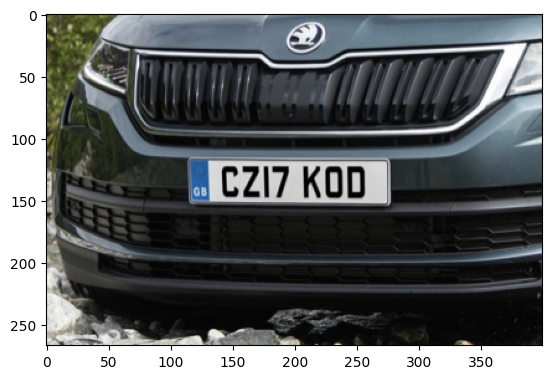

In [10]:
im = Image.open(IMAGE_PATH)
plt.imshow(im)

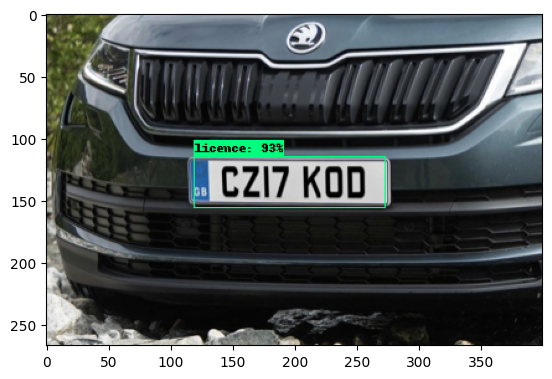

In [9]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img).astype(np.uint8)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.7,
            agnostic_mode=False,
            line_thickness=1)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

## License plate cutout

In [10]:
detections.keys()

dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'raw_detection_boxes', 'raw_detection_scores', 'detection_multiclass_scores', 'detection_anchor_indices', 'num_detections'])

In [11]:
detection_threshold = 0.7

In [12]:
try:
    score = detections['detection_scores'][detections['detection_scores'] > detection_threshold][0]
    box = detections['detection_boxes'][0]
except IndexError:
    print("No car plates detected")
    ### tutaj zwróć coś że nie ma tablicy na zdjęciu i nie można dalej wyszukiwać tekstu
    

In [13]:
img = image_np_with_detections
height = img.shape[0]
width = img.shape[1]

In [14]:
# "ROI" -"Region of Interest" 
# box => [y_min, x_min, y_max, x_max]
roi = box * [height, width, height, width]


plate_img = img[roi[0].astype(int):roi[2].astype(int), roi[1].astype(int):roi[3].astype(int)]
#img[box[0].astype(int):box[1].astype(int), box[2].astype(int):box[3].astype(int)]

In [15]:
roi

array([115.42027295, 119.55105066, 156.87462044, 273.10380936])

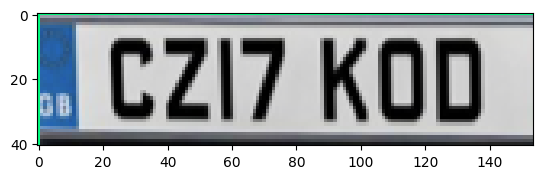

In [16]:
plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))

# OCR on plate 

## pytesseract test

In [17]:
import pytesseract
print(pytesseract.image_to_string(plate_img))


"CZI7 KOD



## easyocr test

In [18]:
# !pip install easyocr

In [19]:
import easyocr

In [20]:
reader = easyocr.Reader(['en'])

In [21]:
ocr_result = reader.readtext(plate_img)
print(ocr_result)

[([[19, 3], [145, 3], [145, 41], [19, 41]], 'CZI7 Kod', 0.39128417188853365)]


## keras_ocr test

In [22]:
import keras_ocr

In [23]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/szczepan/.keras-ocr/craft_mlt_25k.h5
Looking for /home/szczepan/.keras-ocr/crnn_kurapan.h5


In [24]:
pipeline.recognize([plate_img])

1/1 [==============================] - 2s 2s/step


[[('czi7',
   array([[20.174501,  4.670822],
          [80.426056,  6.105385],
          [79.70651 , 36.326344],
          [19.454958, 34.89178 ]], dtype=float32)),
  ('kod',
   array([[ 86.,   6.],
          [142.,   6.],
          [142.,  37.],
          [ 86.,  37.]], dtype=float32)),
  ('ob',
   array([[-2.7554554e-16,  2.5000000e+01],
          [ 1.2000000e+01,  2.5000000e+01],
          [ 1.2000000e+01,  3.4000000e+01],
          [ 0.0000000e+00,  3.4000000e+01]], dtype=float32))]]

In [25]:
# # Read images from folder path to image object
# images = [
#     keras_ocr.tools.read(img) for img in ['./TensorFlow/workspace/training_demo/images/test/Cars109.png',
#                                           './TensorFlow/workspace/training_demo/images/test/Cars120.png',
#                                           './TensorFlow/workspace/training_demo/images/test/Cars142.png']
# ]

In [26]:
# prediction_groups = pipeline.recognize(images)

In [27]:
# # Plot the predictions
# fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
# for ax, image, predictions in zip(axs, images, prediction_groups):
#     keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)

# TESTING RESULTS ON TEST DATA

In [28]:
import glob

folder_path = "./TensorFlow/workspace/training_demo/images/my_photo/"
desired_extension = ".jpg" 

# file names .png in images/test
file_names = glob.glob(os.path.join(folder_path, '*' + desired_extension))

In [43]:
def ocr_results(IMAGE_PATH):
    ###################
        # Wymiary docelowego zdjęcia
    target_width = 400
    target_height = 600

    # Wczytaj oryginalne zdjęcie za pomocą biblioteki PIL
    original_image = Image.open(IMAGE_PATH)

    # Zmniejsz zdjęcie do docelowych wymiarów
    img = original_image.resize((target_width, target_height), Image.Resampling.LANCZOS).rotate(270, expand=True)
    ###########################

    # img = cv2.imread(IMAGE_PATH)
    image_np = np.array(img).astype(np.uint8)

    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.7,
                agnostic_mode=False,
                line_thickness=1)

    plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
    plt.show()

    detection_threshold = 0.5
    is_detect = True
    try:
        score = detections['detection_scores'][detections['detection_scores'] > detection_threshold][0]
        box = detections['detection_boxes'][0]
    except IndexError:
        print("No car plates detected")
        is_detect = False
        ### tutaj zwróć coś że nie ma tablicy na zdjęciu i nie można dalej wyszukiwać tekstu
    if is_detect:
        img = image_np_with_detections
        height = img.shape[0]
        width = img.shape[1]
        # "ROI" -"Region of Interest" 
        # box => [y_min, x_min, y_max, x_max]
        roi = box * [height, width, height, width]


        plate_img = img[roi[0].astype(int):roi[2].astype(int), roi[1].astype(int):roi[3].astype(int)]
        #img[box[0].astype(int):box[1].astype(int), box[2].astype(int):box[3].astype(int)]
        plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))
        plt.show()
        
        print(f" PYTESSERACT RESULT: { pytesseract.image_to_string(plate_img)}")
        
        ocr_result = reader.readtext(plate_img)
        print(f"EASY_OCR RESULT: {ocr_result}")
        
        
        print(f"KERAS_OCR RESULTS: {pipeline.recognize([plate_img])}") 

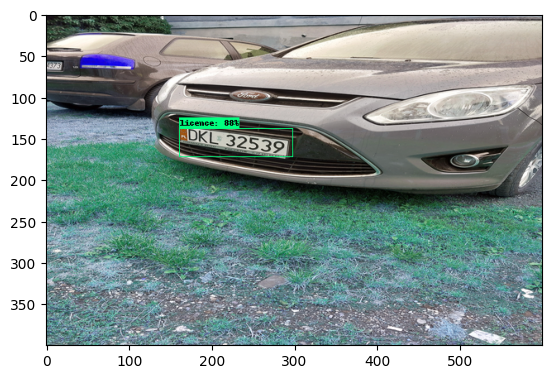

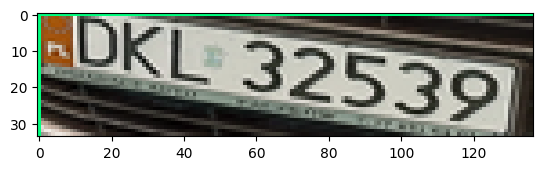

 PYTESSERACT RESULT: 
EASY_OCR RESULT: [([[7, 0], [132, 0], [132, 34], [7, 34]], 'DKL32539', 0.9425887254749069)]
1/1 [==============================] - 0s 136ms/step
KERAS_OCR RESULTS: [[('dkl', array([[10.569233 , -1.5538464],
       [50.93846  ,  3.4923077],
       [48.615383 , 22.076921 ],
       [ 8.246155 , 17.030767 ]], dtype=float32)), ('32539', array([[ 56.746788 ,   4.5857654],
       [130.95566  ,  14.82147  ],
       [128.1972   ,  34.820305 ],
       [ 53.988335 ,  24.5846   ]], dtype=float32))]]


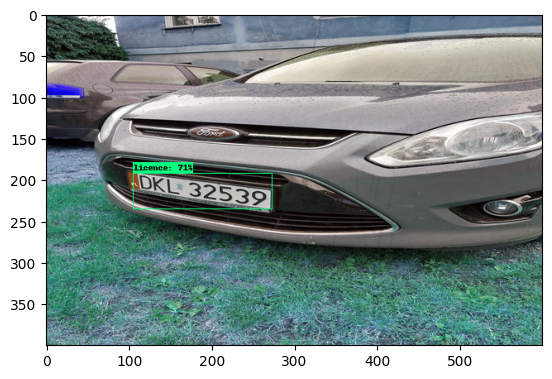

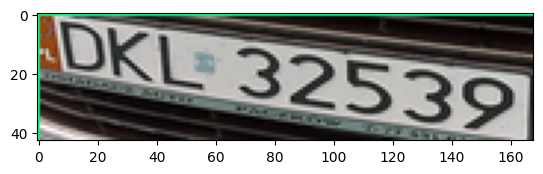

 PYTESSERACT RESULT: 
EASY_OCR RESULT: [([[-0.9779720499582125, -3.8361189448788164], [65.94174202707276, 6.4116515945854475], [61.97797204995821, 30.836118944878816], [-4.941742027072761, 20.588348405414553]], '[DKL', 0.9001468420028687), ([[66.23652010216107, 3.0987763882120607], [168.98596023743556, 19.71010094782179], [162.76347989783892, 46.90122361178794], [60.01403976256445, 30.28989905217821]], '32539', 0.9026978305106917)]
1/1 [==============================] - 0s 128ms/step
KERAS_OCR RESULTS: [[('dkl', array([[ 7.999996,  0.      ],
       [63.459454,  9.243244],
       [60.05405 , 29.675674],
       [ 4.594593, 20.43243 ]], dtype=float32)), ('32539', array([[ 67.03131 ,   9.162015],
       [166.20898 ,  22.211708],
       [162.95166 ,  46.967327],
       [ 63.773987,  33.917633]], dtype=float32))]]


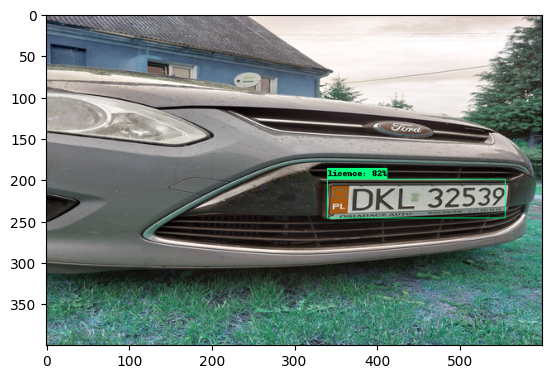

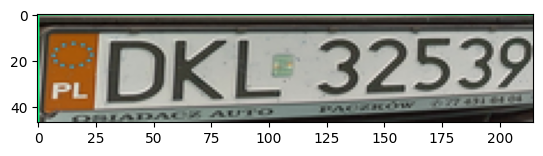

 PYTESSERACT RESULT:  

EASY_OCR RESULT: [([[27, 3], [215, 3], [215, 43], [27, 43]], 'DKL 32539', 0.7179764909820994)]
1/1 [==============================] - 0s 175ms/step
KERAS_OCR RESULTS: [[('32537', array([[122.,   9.],
       [214.,   9.],
       [214.,  40.],
       [122.,  40.]], dtype=float32)), ('dkl', array([[ 30.,  11.],
       [112.,  11.],
       [112.,  43.],
       [ 30.,  43.]], dtype=float32)), ('pl', array([[ 6., 30.],
       [23., 30.],
       [23., 40.],
       [ 6., 40.]], dtype=float32))]]


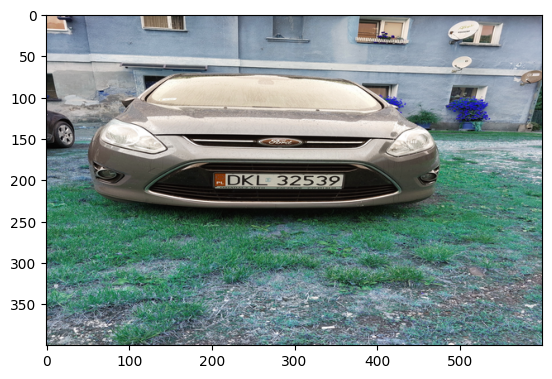

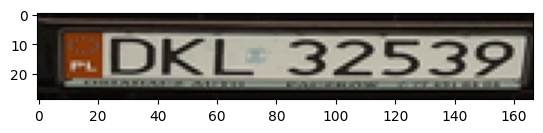

 PYTESSERACT RESULT: 
EASY_OCR RESULT: [([[22, 4], [164, 4], [164, 28], [22, 28]], 'DKL 32532', 0.640120687344735)]
1/1 [==============================] - 0s 124ms/step
KERAS_OCR RESULTS: [[('dkl', array([[24.,  8.],
       [76.,  8.],
       [76., 23.],
       [24., 23.]], dtype=float32)), ('32589', array([[ 85.,   8.],
       [163.,   8.],
       [163.,  24.],
       [ 85.,  24.]], dtype=float32))]]


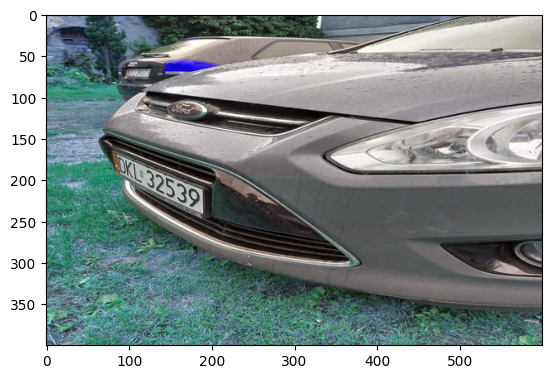

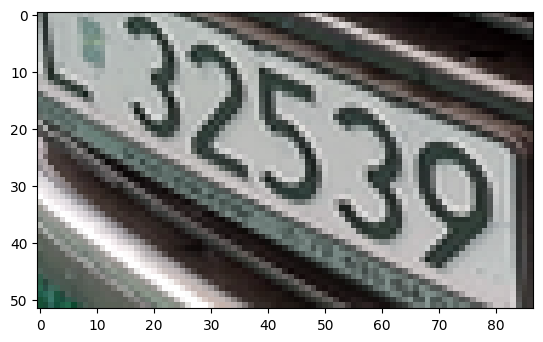

 PYTESSERACT RESULT: 
EASY_OCR RESULT: [([[2.363070244701518, -12.948964482850588], [93.99236964120786, 23.753049300543843], [79.63692975529848, 56.94896448285059], [-10.992369641207851, 18.246950699456157]], '42539', 0.7953480213045105)]
1/1 [==============================] - 0s 84ms/step
KERAS_OCR RESULTS: [[('3', array([[ 3.922844 , -9.480207 ],
       [92.39493  , 27.128935 ],
       [81.6132   , 53.184776 ],
       [-6.8588867, 16.575632 ]], dtype=float32))]]


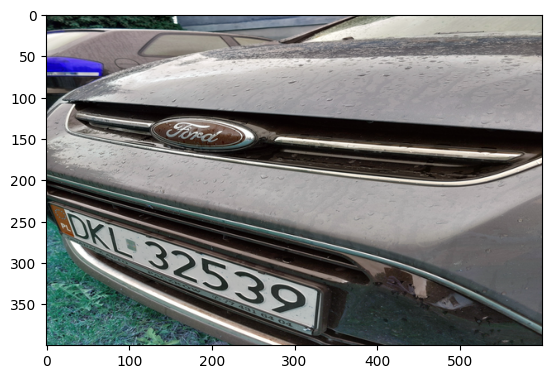

No car plates detected


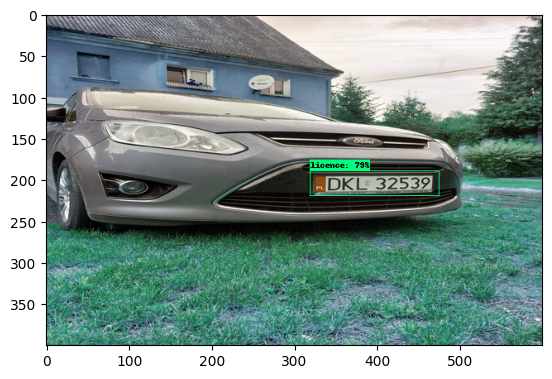

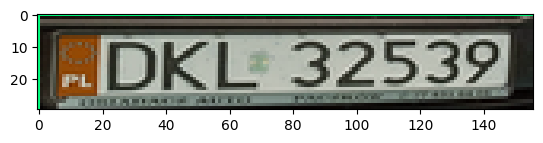

 PYTESSERACT RESULT: 
EASY_OCR RESULT: [([[20, 4], [150, 4], [150, 30], [20, 30]], 'DKL 32539', 0.601259680164672)]
1/1 [==============================] - 0s 123ms/step
KERAS_OCR RESULTS: [[('dkle', array([[20.,  7.],
       [73.,  7.],
       [73., 27.],
       [20., 27.]], dtype=float32)), ('32539', array([[ 79.,   7.],
       [147.,   7.],
       [147.,  26.],
       [ 79.,  26.]], dtype=float32))]]


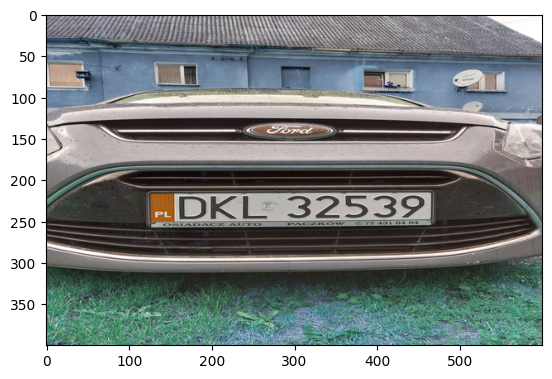

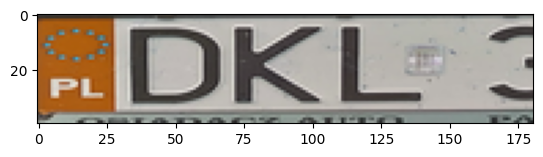

 PYTESSERACT RESULT:  

EASY_OCR RESULT: [([[3, 21], [25, 21], [25, 35], [3, 35]], 'PL', 0.884868641154046), ([[29, 1], [155, 1], [155, 39], [29, 39]], 'DKL', 0.9998286952580301)]
1/1 [==============================] - 0s 133ms/step
KERAS_OCR RESULTS: [[('dkle', array([[ 35.,   3.],
       [147.,   3.],
       [147.,  35.],
       [ 35.,  35.]], dtype=float32)), ('pl', array([[ 4.262295 , 21.114756 ],
       [25.631147 , 23.057379 ],
       [24.745901 , 32.795082 ],
       [ 3.3770485, 30.85246  ]], dtype=float32))]]


In [44]:
for name in file_names[:10]:
    ocr_results(name)
    

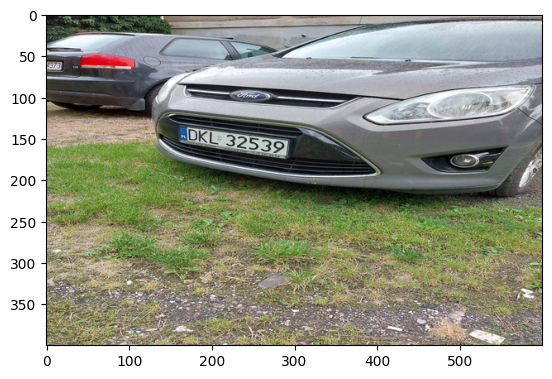

In [40]:
input_image_path = file_names[0]

# Wymiary docelowego zdjęcia
target_width = 400
target_height = 600

# Wczytaj oryginalne zdjęcie za pomocą biblioteki PIL
original_image = Image.open(input_image_path)

# Zmniejsz zdjęcie do docelowych wymiarów
resized_image = original_image.resize((target_width, target_height), Image.Resampling.LANCZOS).rotate(270, expand=True)

plt.imshow(resized_image)